In [1]:
from pynq import PL
from pynq import Overlay

from pynq import DefaultHierarchy
from pynq import allocate
from doa_mts import *
o1 = doaMtsOverlay('doa_mts.bit')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import ipywidgets as ipw

In [16]:
o1.init_tile_sync()
o1.verify_clock_tree()
o1.sync_tiles()

In [4]:
#AlignedCaptureSamples = np.zeros((1,len(o1.adc_capture)),dtype=np.int16)
channels = 8 # 4 I + 4 Q

AlignedCaptureSamples = np.zeros((1,len(o1.adc_capture)),dtype=np.int16)
o1.internal_capture(AlignedCaptureSamples)

N = len(o1.adc_capture) // channels
ShapedCaptureSamples = np.zeros((channels, N), dtype=np.int16)
for i in range(channels):
    ShapedCaptureSamples[i] = AlignedCaptureSamples[0][i::channels]
    

#plt.plot(ShapedCaptureSamples[0:1000])
#plt.show()

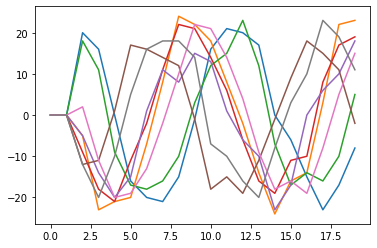

In [5]:
for x in range(channels):
    plt.plot(ShapedCaptureSamples[x][0:20])


plt.show()

In [6]:
from scipy.io import savemat
mdic = {"data": AlignedCaptureSamples, "label": "data"}
print(mdic)
savemat("test.mat", mdic)

{'data': array([[  0,   0,   0, ..., -10,  15,  -4]], dtype=int16), 'label': 'data'}


In [7]:
mdic = {"data2": ShapedCaptureSamples, "label": "data2"}
print(mdic)
savemat("test2.mat", mdic)

{'data2': array([[  0,   0,  20, ..., -17,  -3,   8],
       [  0,   0,  -5, ...,  16,  25,  24],
       [  0,   0,  18, ..., -16,   3,  12],
       ...,
       [  0,   0, -12, ...,   9,  -2, -10],
       [  0,   0,   2, ...,   0,  13,  15],
       [  0,   0, -12, ...,  15,   6,  -4]], dtype=int16), 'label': 'data2'}


In [8]:
iqData = np.zeros((4, N), dtype=np.cdouble)
idx = 0
for i in range(0, 8, 2):
    iqData[idx] = np.conjugate(ShapedCaptureSamples[i] + 1j * ShapedCaptureSamples[i+1])
    idx = idx + 1
print(iqData)


[[  0. -0.j   0. -0.j  20. +5.j ... -17.-16.j  -3.-25.j   8.-24.j]
 [  0. -0.j   0. -0.j  18. +9.j ... -16.-16.j   3.-22.j  12.-19.j]
 [  0. -0.j   0. -0.j  -5.+12.j ...   6. -9.j  20. +2.j  14.+10.j]
 [  0. -0.j   0. -0.j   2.+12.j ...   0.-15.j  13. -6.j  15. +4.j]]


In [17]:
channels = 8 # 4 I + 4 Q

AlignedCaptureSamples = np.zeros((1,len(o1.adc_capture)),dtype=np.int16)
o1.internal_capture(AlignedCaptureSamples)

N = len(o1.adc_capture) // channels
ShapedCaptureSamples = np.zeros((channels, N), dtype=np.int16)
for i in range(channels):
    ShapedCaptureSamples[i] = AlignedCaptureSamples[0][i::channels]



sample_frequency = 100e6
number_samples = len(ShapedCaptureSamples[0])
def plot_complex_time(data, n=number_samples, fs=sample_frequency, 
                      title='Complex Time Plot'):
    plt_re_temp = (go.Scatter(x = np.arange(0, n/fs, 1/fs),
                              y = np.real(data), name='Real'))
    plt_im_temp = (go.Scatter(x = np.arange(0, n/fs, 1/fs),
                              y = np.imag(data), name='Imag'))
    return go.FigureWidget(data = [plt_re_temp, plt_im_temp],
                           layout = {'title': title, 
                                     'xaxis': {
                                         'title': 'Seconds (s)',
                                         'autorange' : True},
                                     'yaxis': {
                                         'title': 'Amplitude (V)'}})

tfigs = []
for i in range(0, 4):
    tfigs.append(plot_complex_time(
            data=iqData[i], 
            title=''.join(['Time Domain Plot of ADC Channel ', str(i)])))

ipw.VBox(tfigs)

    'data': [{'name': 'Real',
              'type': 'scatter',
              'ui…

In [10]:
mdic = {"rawData": iqData}
print(mdic)
savemat("rawData.mat", mdic)

{'rawData': array([[  0. -0.j,   0. -0.j,  20. +5.j, ..., -17.-16.j,  -3.-25.j,
          8.-24.j],
       [  0. -0.j,   0. -0.j,  18. +9.j, ..., -16.-16.j,   3.-22.j,
         12.-19.j],
       [  0. -0.j,   0. -0.j,  -5.+12.j, ...,   6. -9.j,  20. +2.j,
         14.+10.j],
       [  0. -0.j,   0. -0.j,   2.+12.j, ...,   0.-15.j,  13. -6.j,
         15. +4.j]])}
